<a href="https://colab.research.google.com/github/ElenaSNovikova/xAutoML_Project1/blob/main/Critical_Difference_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats

# visualization packages 
import matplotlib.pyplot as plt
import seaborn as sns
# import urllib.request
import requests

# for ignoring the warnings massages.
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
results = pd.read_csv('model_cmp.csv')
results

,Unnamed: 0,fold_1,fold_2,fold_3,fold_4,fold_5
0,DummyClassifier,0.000000,0.000000,0.000000,0.000000,0.000000
1,LinearDiscriminantAnalysis,0.813793,0.830986,0.797297,0.838710,0.794521
2,QuadraticDiscriminantAnalysis,0.117746,0.115517,0.105008,0.124057,0.110831
3,LogisticRegression,0.662577,0.688742,0.725000,0.701299,0.670807
4,DecisionTreeClassifier,0.753247,0.789474,0.784314,0.708571,0.805195
5,KNeighborsClassifier,0.097561,0.162791,0.139535,0.139535,0.049383
6,SVC,0.000000,0.000000,0.000000,0.000000,0.000000
7,RandomForestClassifier,0.842857,0.846715,0.827586,0.847682,0.861111
8,ExtraTreesClassifier,0.845070,0.863309,0.857143,0.853333,0.853147
9,GaussianNB,0.210291,0.251928,0.221719,0.258929,0.236145


In [3]:
df = results.T
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
df

,DummyClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,RandomForestClassifier,ExtraTreesClassifier,GaussianNB,MLPClassifier,PassiveAggressiveClassifier
fold_1,0.0,0.813793,0.117746,0.662577,0.753247,0.097561,0.0,0.842857,0.84507,0.210291,0.556522,0.024096
fold_2,0.0,0.830986,0.115517,0.688742,0.789474,0.162791,0.0,0.846715,0.863309,0.251928,0.545455,0.0
fold_3,0.0,0.797297,0.105008,0.725,0.784314,0.139535,0.0,0.827586,0.857143,0.221719,0.245283,0.096386
fold_4,0.0,0.83871,0.124057,0.701299,0.708571,0.139535,0.0,0.847682,0.853333,0.258929,0.04878,0.0
fold_5,0.0,0.794521,0.110831,0.670807,0.805195,0.049383,0.0,0.861111,0.853147,0.236145,0.237477,0.0


In [4]:
df = df[['LinearDiscriminantAnalysis', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier']]
df = df.T
df

,fold_1,fold_2,fold_3,fold_4,fold_5
LinearDiscriminantAnalysis,0.813793,0.830986,0.797297,0.83871,0.794521
DecisionTreeClassifier,0.753247,0.789474,0.784314,0.708571,0.805195
ExtraTreesClassifier,0.84507,0.863309,0.857143,0.853333,0.853147
RandomForestClassifier,0.842857,0.846715,0.827586,0.847682,0.861111


In [5]:
ranks = pd.DataFrame()
ranks['r1'] = df['fold_1'].rank(ascending=False)
ranks['r2'] = df['fold_2'].rank(ascending=False)
ranks['r3'] = df['fold_3'].rank(ascending=False)
ranks['r4'] = df['fold_4'].rank(ascending=False)
ranks['r5'] = df['fold_5'].rank(ascending=False)
ranks['mean'] = ranks.mean(axis=1)
ranks

,r1,r2,r3,r4,r5,mean
LinearDiscriminantAnalysis,3.0,3.0,3.0,3.0,4.0,3.2
DecisionTreeClassifier,4.0,4.0,4.0,4.0,3.0,3.8
ExtraTreesClassifier,1.0,1.0,1.0,1.0,2.0,1.2
RandomForestClassifier,2.0,2.0,2.0,2.0,1.0,1.8


In [6]:
ranks['mean']

LinearDiscriminantAnalysis    3.2
DecisionTreeClassifier        3.8
ExtraTreesClassifier          1.2
RandomForestClassifier        1.8
Name: mean, dtype: float64

cd= 1.9546928147409763


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: OrangeDeprecationWarning: compute_CD is deprecated and will be removed in Orange 3.34.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: OrangeDeprecationWarning: graph_ranks is deprecated and will be removed in Orange 3.34.
  import sys


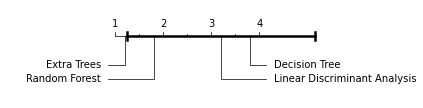

In [7]:
import Orange

names = ["Linear Discriminant Analysis", "Decision Tree", "Extra Trees", "Random Forest"]
avranks = ranks['mean']
cd = Orange.evaluation.compute_CD(avranks, 5, alpha="0.05", test="bonferroni-dunn")
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.5, cdmethod=0)
plt.show();